# Capstone Project

<a href="https://drive.google.com/drive/u/1/folders/1AUq-ZUWuY3IkzBd5Yj02BGtXEll6kVZU">DATA</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [6]:
img_path="Train/"
labels=[item for item in os.listdir(img_path) if os.path.isdir(os.path.join(img_path,item))]

In [8]:
#Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):          #Klasörün içindeki alt klasörleri söyler
        img_list.append(img_path+label+'/'+img_file)     # apppend dizinin sonuna eklme yapıyor
        label_list.append(label)

df=pd.DataFrame({"img": img_list,"label": label_list})  # Bunları bir dataframe e attık

In [10]:
df.sample()

,img,label
21836,Train/30/00030_00005_00014.png,30


In [12]:
df.label.value_counts()

label
2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
18    1200
35    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
6      420
16     420
34     420
36     390
22     390
40     360
20     360
21     330
39     300
24     270
29     270
42     240
27     240
41     240
32     240
0      210
37     210
19     210
Name: count, dtype: int64

In [14]:
image=cv2.imread(str(df["img"][1]))
image.shape

(29, 28, 3)

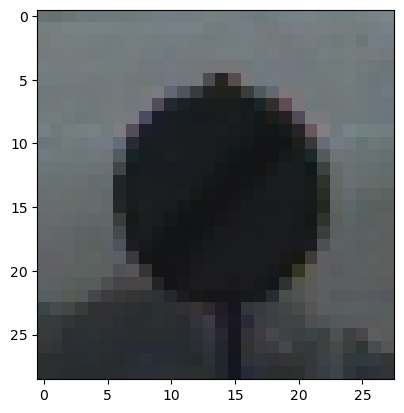

In [16]:
plt.imshow(image)

In [18]:
x=[]
for img in df["img"]:
    img=cv2.imread(img)
    img=cv2.resize(img,(30,30))  #Boyutunu 32*32 px yaptık
    img=img/255.0  #Normalize Ettik
    x.append(img)

In [19]:
x=np.array(x)

In [20]:
y=df["label"].astype(int)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
model=Sequential()
model.add(Input(shape=(30,30,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(43, activation='softmax')) # 10 fakli cevap classification 0-9 a kadar olan rakamlar
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6528 - loss: 1.3592 - val_accuracy: 0.9606 - val_loss: 0.1410
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9606 - loss: 0.1289 - val_accuracy: 0.9542 - val_loss: 0.1562
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9725 - loss: 0.0899 - val_accuracy: 0.9776 - val_loss: 0.0832
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9810 - loss: 0.0609 - val_accuracy: 0.9828 - val_loss: 0.0742
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9851 - loss: 0.0473 - val_accuracy: 0.9415 - val_loss: 0.2913
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0636 - val_accuracy: 0.9660 - val_loss: 0.1289
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9865 - loss: 0.0486 - val_accuracy: 0.9890 - val_loss: 0.0590
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9855 - loss: 0.0557 - val_accuracy: 0.

In [29]:
loss,accuracy=model.evaluate(x_test,y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9934 - loss: 0.0422


In [30]:
model.save("traffic_model.h5")